In [1]:
!pip install pyLDAvis -qq
!pip install -qq -U gensim
!pip install spacy -qq
!pip install matplotlib -qq
!pip install seaborn -qq
!python -m spacy download en_core_web_md -qq

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
!python -m spacy download en_core_web_md -qq

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [3]:
!pip install spacy

In [4]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 4.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
!python -m spacy download en

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.5.0/en_core_web_sm-3.5.0-py3-none-any.whl (12.8 MB)
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
import spacy

In [7]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import spacy
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()# Visualise inside a notebook
import en_core_web_md
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaMulticore
from gensim.models import CoherenceModel

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ASUS\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ASUS\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [9]:
# Data Collection

bbcnews = pd.read_csv(r'C:\Users\ASUS\Desktop\Capstone project\bbc_news.csv')
bbcnews.head()

title  \
0  Ukraine: Angry Zelensky vows to punish Russian...   
1  War in Ukraine: Taking cover in a town under a...   
2         Ukraine war 'catastrophic for global food'   
3  Manchester Arena bombing: Saffie Roussos's par...   
4  Ukraine conflict: Oil price soars to highest l...   

                         pubDate  \
0  Mon, 07 Mar 2022 08:01:56 GMT   
1  Sun, 06 Mar 2022 22:49:58 GMT   
2  Mon, 07 Mar 2022 00:14:42 GMT   
3  Mon, 07 Mar 2022 00:05:40 GMT   
4  Mon, 07 Mar 2022 08:15:53 GMT   

                                               guid  \
0  https://www.bbc.co.uk/news/world-europe-60638042   
1  https://www.bbc.co.uk/news/world-europe-60641873   
2      https://www.bbc.co.uk/news/business-60623941   
3            https://www.bbc.co.uk/news/uk-60579079   
4      https://www.bbc.co.uk/news/business-60642786   

                                                link  \
0  https://www.bbc.co.uk/news/world-europe-606380...   
1  https://www.bbc.co.uk/news/world-europe-606418...   
2  https://www.bbc.co.uk/news/business-60623941?a...   
3  https://www.bbc.co.uk/news/uk-60579079?at_medi...   
4  https://www.bbc.co.uk/news/business-60642786?a...   

                                         description  
0  The Ukrainian president says the country will ...  
1  Jeremy Bowen was on the frontline in Irpin, as...  
2  One of the world's biggest fertiliser firms sa...  
3  The parents of the Manchester Arena bombing's ...  
4  Consumers are feeling the impact of higher ene...

In [10]:
bbcnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13613 entries, 0 to 13612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        13613 non-null  object
 1   pubDate      13613 non-null  object
 2   guid         13613 non-null  object
 3   link         13613 non-null  object
 4   description  13613 non-null  object
dtypes: object(5)
memory usage: 531.9+ KB


In [11]:
# Data Preprocessing using spaCy model
nlp = en_core_web_md.load()

In [12]:
# Tags that need to be removed
words_removed= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for description in nlp.pipe(bbcnews['description']):
   proj_tok = [token.lemma_.lower() for token in description if token.pos_ not in words_removed and not token.is_stop and token.is_alpha]
   tokens.append(proj_tok)

In [13]:
#New column with stopwords removed
bbcnews['tokens'] = tokens

In [14]:
bbcnews['tokens']

0        [ukrainian, president, say, country, forgive, ...
1        [jeremy, bowen, frontline, irpin, resident, co...
2        [world, big, fertiliser, firm, say, conflict, ...
3        [parent, manchester, arena, bombing, young, vi...
4        [consumer, feel, impact, high, energy, cost, f...
                               ...                        
13608    [aerial, footage, show, thick, dark, smoke, bi...
13609    [day, turkey, devastating, earthquake, moment,...
13610    [look, bbc, able, cover, story, limited, acces...
13611    [slow, initial, response, road, city, gridlock...
13612    [ahmed, al, masri, describe, horror, feel, tre...
Name: tokens, Length: 13613, dtype: object

In [15]:
# Creating some random topics

topics = [ ['social distance','quarantine','covid'tests'],
           ['healthcare', 'medicine', 'doctor'],
           ['covid', 'covid-19', '2019-nCoV', 'coronavirus'],
           ['symptom', 'headache', 'body aches', 'cough', 'dead',],
           ['disease', 'positive', 'covid']
          ]

# Creating a dictionary with the vocabulary
word2id = Dictionary( bbcnews['tokens'] )

# Coherence model
cm = CoherenceModel(topics=topics, 
                    texts=bbcnews['tokens'],
                    coherence='c_v',  
                    dictionary=word2id)

coherence_per_topic = cm.get_coherence_per_topic()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17292\1388734743.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


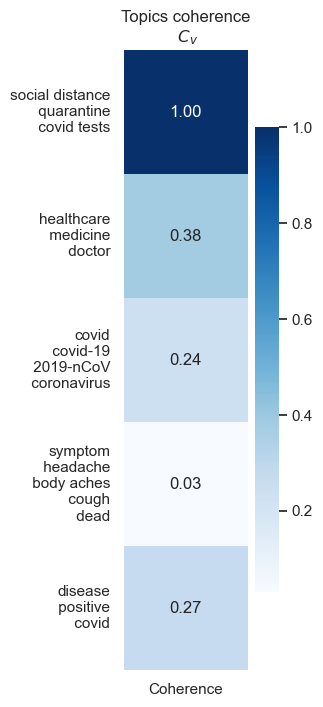

In [16]:
topics_str = [ '\n '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )
data_topic_score = data_topic_score.set_index('Topic')

fig, ax = plt.subplots( figsize=(2,30) )
ax.set_title("Topics coherence\n $C_v$")
sns.heatmap(data=data_topic_score, annot=True, square=True,
            cmap='Blues', fmt='.2f',
            linecolor='black', ax=ax )
plt.yticks( rotation=0 )
ax.set_xlabel('')
ax.set_ylabel('')
fig.show()

In [21]:
# Creating dictionary
dictionary = Dictionary(bbcnews['tokens'])

In [22]:
# Printing to see 14285 Unique IDs
print(dictionary.token2id)

{'civilian': 0, 'country': 1, 'forget': 2, 'forgive': 3, 'murder': 4, 'president': 5, 'say': 6, 'ukrainian': 7, 'bowen': 8, 'come': 9, 'fire': 10, 'flee': 11, 'frontline': 12, 'irpin': 13, 'jeremy': 14, 'resident': 15, 'russian': 16, 'try': 17, 'big': 18, 'conflict': 19, 'deliver': 20, 'fertiliser': 21, 'firm': 22, 'food': 23, 'shock': 24, 'supply': 25, 'world': 26, 'arena': 27, 'bombing': 28, 'die': 29, 'life': 30, 'manchester': 31, 'parent': 32, 'speak': 33, 'victim': 34, 'young': 35, 'bill': 36, 'consumer': 37, 'cost': 38, 'energy': 39, 'feel': 40, 'fuel': 41, 'high': 42, 'household': 43, 'impact': 44, 'jump': 45, 'price': 46, 'boris': 47, 'canadian': 48, 'debate': 49, 'dutch': 50, 'johnson': 51, 'law': 52, 'meet': 53, 'mp': 54, 'new': 55, 'oligarch': 56, 'pm': 57, 'target': 58, 'application': 59, 'capacity': 60, 'grant': 61, 'home': 62, 'secretary': 63, 'surge': 64, 'access': 65, 'content': 66, 'live': 67, 'netflix': 68, 'platform': 69, 'russians': 70, 'streaming': 71, 'suspend': 7

In [23]:
#Filtering low frequency and high frequency tokens
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [24]:
#Creating a corpus
corpus = [dictionary.doc2bow(doc) for doc in bbcnews['tokens']]

In [25]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(4, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)],
 [(28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(4, 1), (46, 1), (47, 1), (48, 1)],
 [(43, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)],
 [(54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1)],
 [(60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(1, 1), (8, 1), (55, 1), (57, 1), (66, 1), (67, 1), (68, 1)],
 [(5, 1),
  (11, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1)],
 [(5, 1), (6, 1), (41, 1), (76, 1), (77, 1), (78, 1), (79, 1)],
 [(27, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)],


In [26]:
# Model Building
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=25, num_topics=10, workers = 4, passes=10)

In [27]:
lda_model

In [28]:
from gensim import models

In [33]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [30]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [37]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=bbcnews['tokens']):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=bbcnews['tokens'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14772\2523173118.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14772\2523173118.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0               8              0.7297   
1            1               8              0.8875   
2            2               5              0.4852   
3            3               5              0.4310   
4            4               7              0.9100   
5            5               7              0.4376   
6            6               5              0.8200   
7            7               8              0.6048   
8            8               5              0.6529   
9            9               8              0.5221   

                                            Keywords  \
0  ukraine, russia, russian, say, war, president,...   
1  ukraine, russia, russian, say, war, president,...   
2  uk, find, new, say, people, home, star, help, ...   
3  uk, find, new, say, people, home, star, help, ...   
4  minister, government, lead, paper, prime, part...   
5  minister, government, lead, paper, prime, part...   
6  uk, find, new, say, people, home, star, help, ...   
7  ukraine, russia, russian, say, war, president,...   
8  uk, find, new, say, people, home, star, help, ...   
9  ukraine, russia, russian, say, war, president,...   

                                                Text  
0  [ukrainian, president, say, country, forgive, ...  
1  [jeremy, bowen, frontline, irpin, resident, co...  
2  [world, big, fertiliser, firm, say, conflict, ...  
3  [parent, manchester, arena, bombing, young, vi...  
4  [consumer, feel, impact, high, energy, cost, f...  
5  [boris, johnson, meet, canadian, dutch, pm, mp...  
6  [home, secretary, say, surge, capacity, applic...  
7  [tiktok, suspend, live, streaming, new, conten...  
8  [thing, need, know, coronavirus, pandemic, mon...  
9  [people, hold, city, st, petersburg, west, vla...

C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\ASUS\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_fo

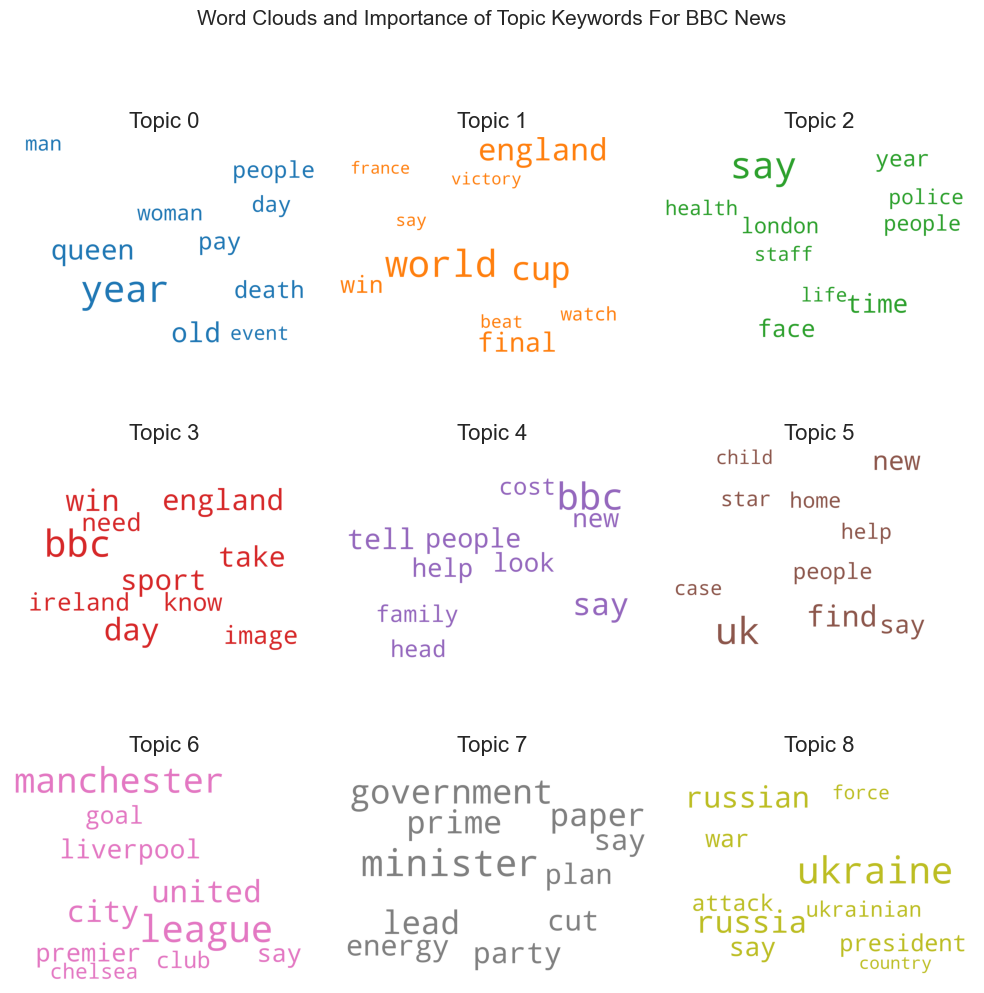

In [74]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.suptitle('Word Clouds and Importance of Topic Keywords For BBC News', fontsize=15, y=1.05) 
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14772\4233151862.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14772\4233151862.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14772\4233151862.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14772\4233151862.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14772

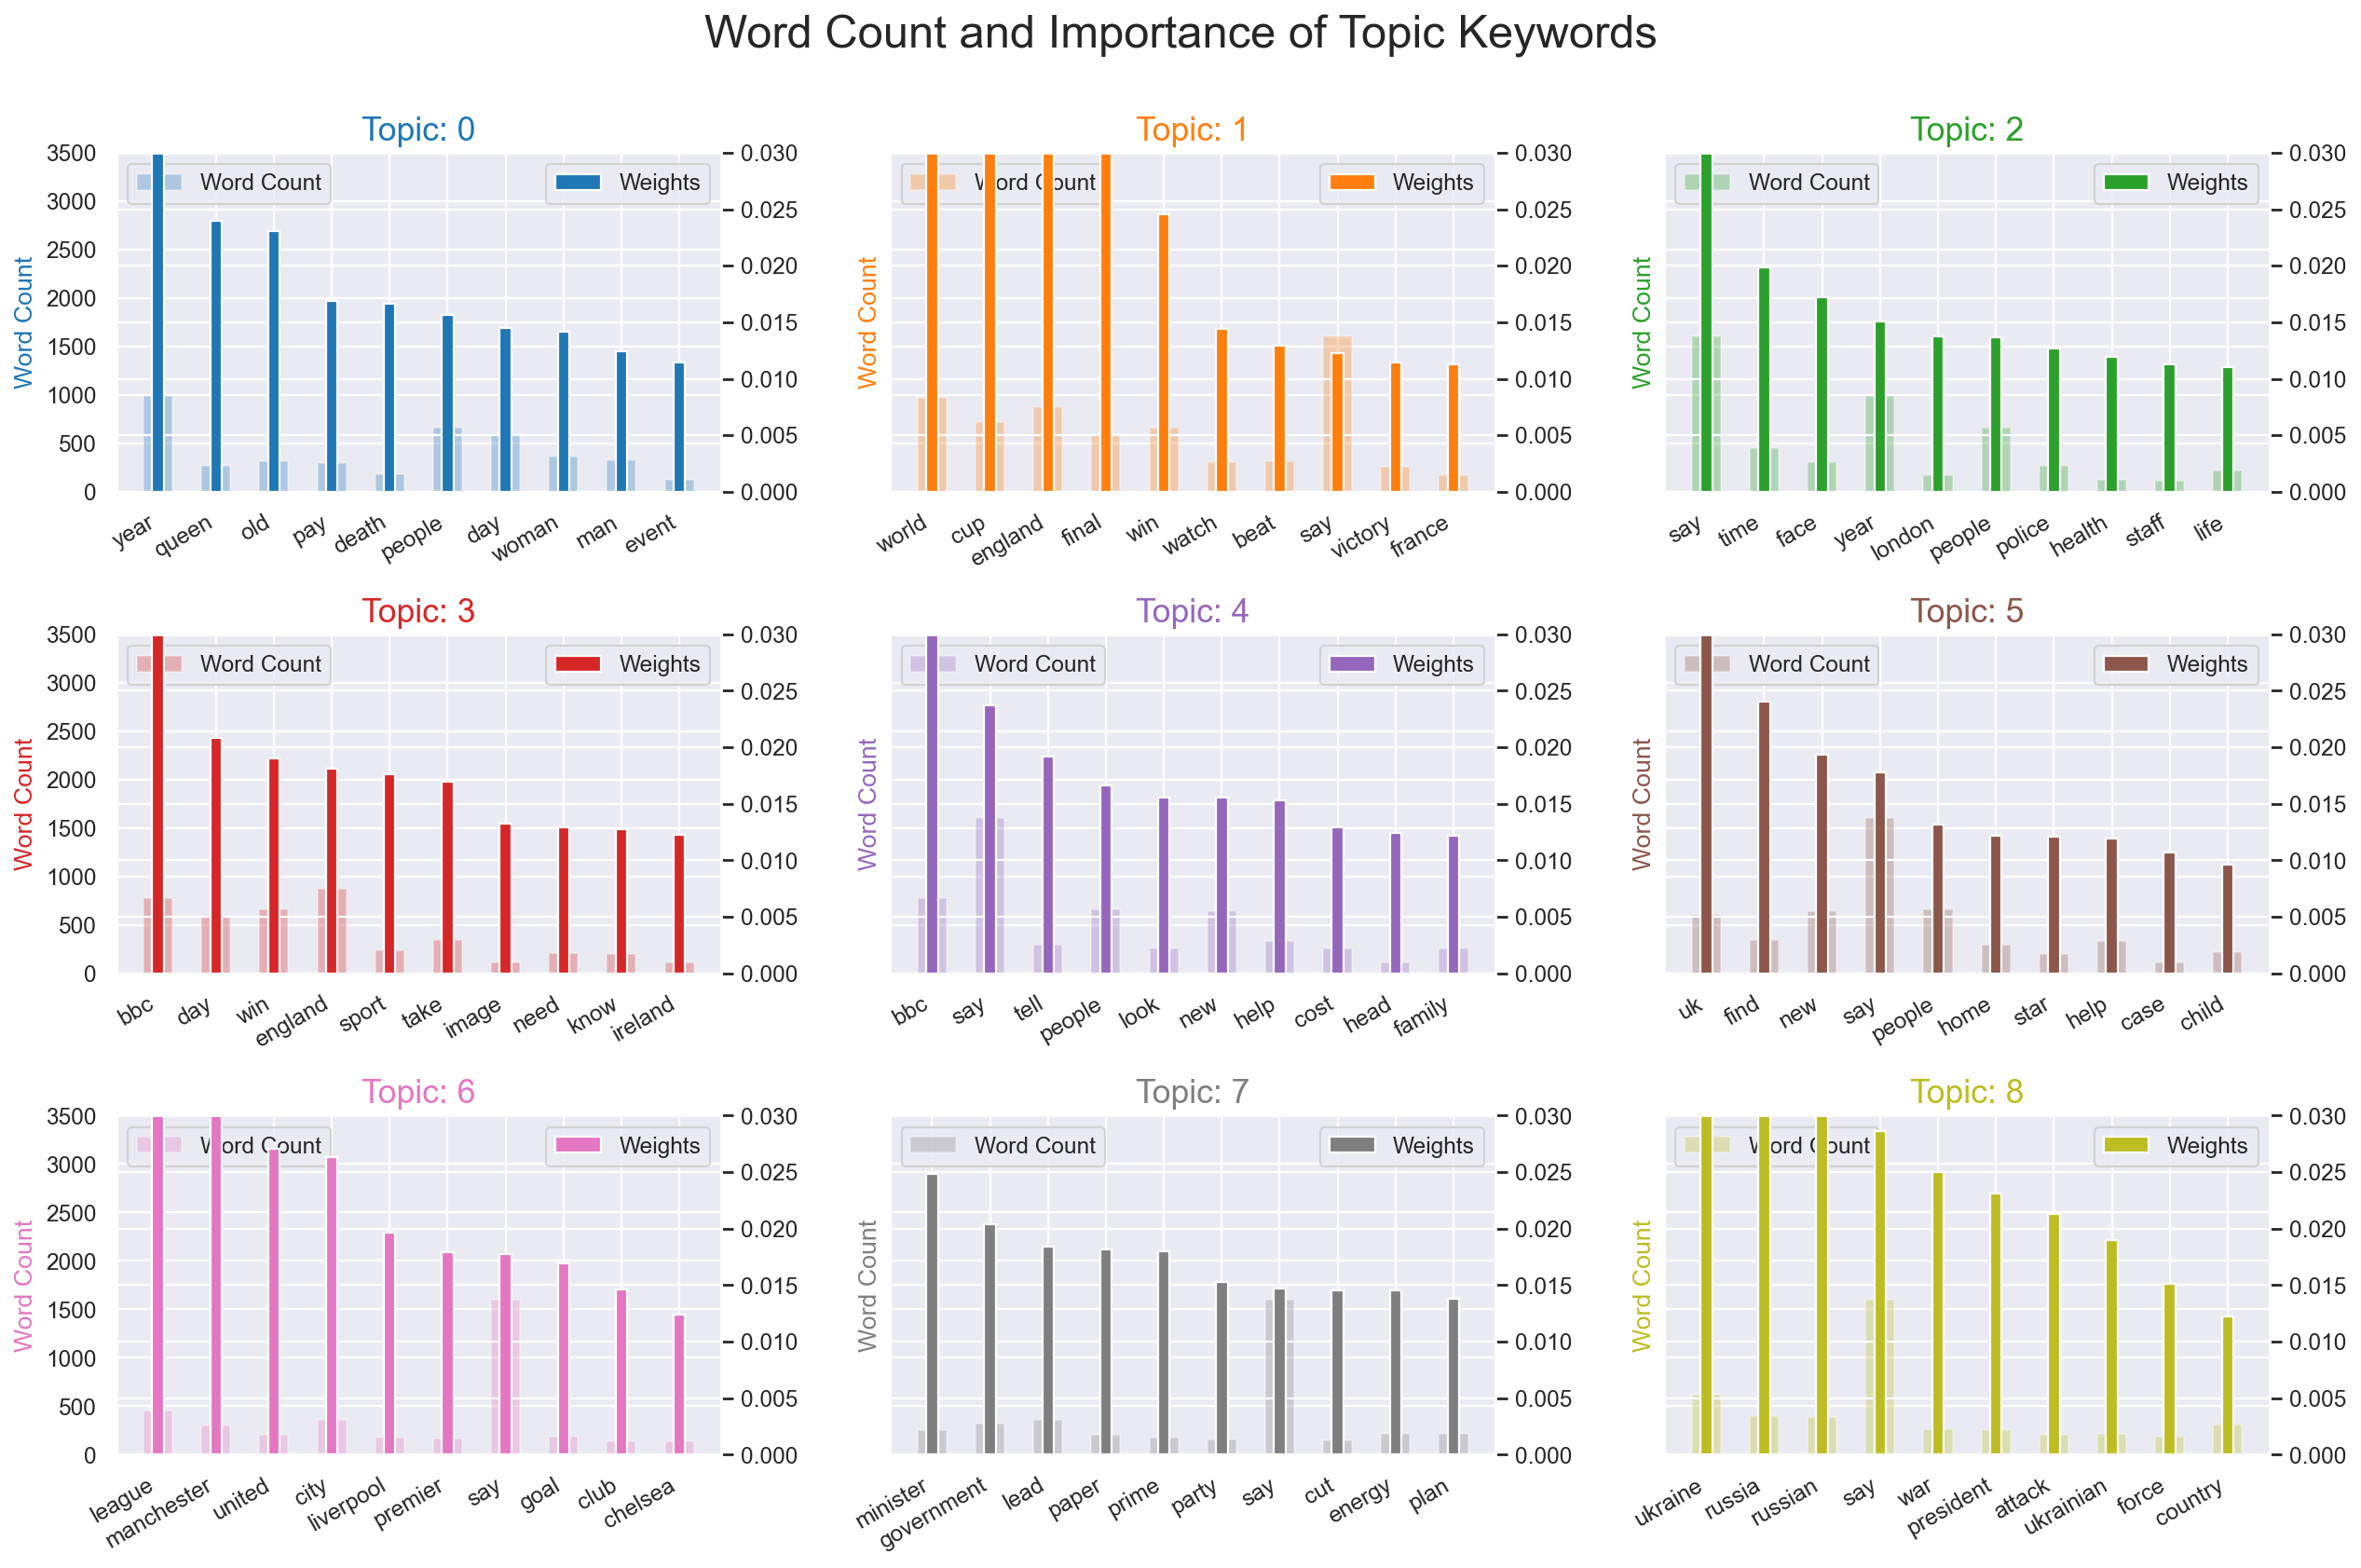

In [41]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in bbcnews['tokens'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [47]:
with open(r"C:\Users\ASUS\Desktop\bbc_newsonlytext11.txt", encoding="utf8") as mytxt:
    for line in mytxt:
        print (line)

description

The Ukrainian president says the country will not forgive or forget those who murder its civilians.

"Jeremy Bowen was on the frontline in Irpin, as residents came under Russian fire while trying to flee."

One of the world's biggest fertiliser firms says the conflict could deliver a shock to food supplies.

The parents of the Manchester Arena bombing's youngest victim speak about their life since she died.

Consumers are feeling the impact of higher energy costs as fuel prices and household bills jump.

"Boris Johnson is to meet the Canadian and Dutch PMs, as MPs debate new laws targeting oligarchs."

"The home secretary says she is ""surging capacity"" as about 1% of 5,500 applications are granted."

"TikTok suspends live streaming and new content from its platform, while Russians can no longer access Netflix."

Five things you need to know about the coronavirus pandemic this Monday morning.

"People have been held in 53 cities, from St Petersburg in the west to Vladivos

In [59]:
str(bbcnews['tokens'])

'0        [ukrainian, president, say, country, forgive, ...\n1        [jeremy, bowen, frontline, irpin, resident, co...\n2        [world, big, fertiliser, firm, say, conflict, ...\n3        [parent, manchester, arena, bombing, young, vi...\n4        [consumer, feel, impact, high, energy, cost, f...\n                               ...                        \n13608    [aerial, footage, show, thick, dark, smoke, bi...\n13609    [day, turkey, devastating, earthquake, moment,...\n13610    [look, bbc, able, cover, story, limited, acces...\n13611    [slow, initial, response, road, city, gridlock...\n13612    [ahmed, al, masri, describe, horror, feel, tre...\nName: tokens, Length: 13613, dtype: object'

In [71]:
covid = ['covid', 'covid-19', '2019-nCoV', 'coronavirus', 'COVID']

In [66]:
covid1 = ['A', 'Covid', 'jab', 'that', 'targets', 'Covid']

In [72]:
word_check=[]
for each_entry in covid: 
    word = re.match("(?i)(^.*(co*v*i*).*$)",each_entry)
    if word:
        word_check.append(each_entry)
word_check

['covid', 'covid-19', '2019-nCoV', 'coronavirus', 'COVID']

In [53]:
email_combination = ["email","email address","e-mail","e-mail_address","EMAIL","customer_email"]

In [54]:
email_check=[]
for each_entry in email_combination: 
    email = re.match("(?i)(^.*(e.*mail).*$)",each_entry)
    if email:
        email_check.append(each_entry)
email_check

['email',
 'email address',
 'e-mail',
 'e-mail_address',
 'EMAIL',
 'customer_email']

In [22]:
# Compute Perplexity Score
print('nPerplexity Score: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=bbcnews['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

nPerplexity Score:  -6.615505429167154
nCoherence Score:  0.3255077531312492


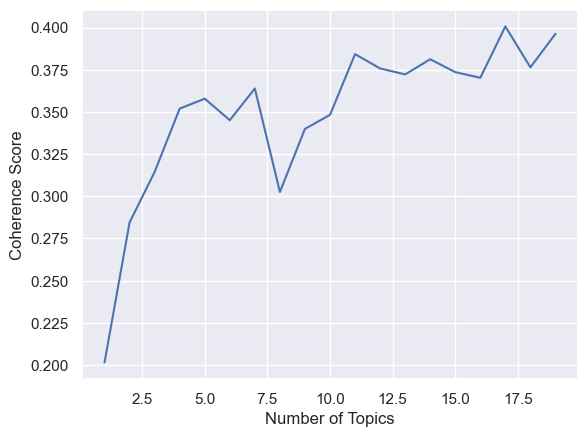

In [23]:
# Calculating Coherence score using C_v:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts = bbcnews['tokens'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [33]:
# supporting function  
def compute_coherence_values(corpus, dictionary, k, a, b):      
    lda_model = gensim.models.LdaMulticore(corpus=corpus,  
                                           id2word=dictionary,  
                                           num_topics=k,   
                                           random_state=100,  
                                           chunksize=100,  
                                           passes=10,  
                                           alpha=a,  
                                           eta=b,  
                                           per_word_topics=True)  
      
    coherence_model_lda = CoherenceModel(model=lda_model, texts=bbcnews['tokens'], dictionary=dictionary, coherence='c_v')  
      
    return coherence_model_lda.get_coherence()  

In [25]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus1, num_topics=num_topics, id2word=id2word1,random_seed = 96)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [29]:
import gensim
from gensim.utils import simple_preprocess

In [34]:
%%time  
import numpy as np  
import tqdm  
grid = {}  
grid['Validation_Set'] = {}  
# Topics range  
min_topics = 2  
max_topics = 11  
step_size = 1  
topics_range = range(min_topics, max_topics, step_size)  
# Alpha parameter  
alpha = list(np.arange(0.01, 1, 0.3))  
alpha.append('symmetric')  
alpha.append('asymmetric')  
# Beta parameter  
beta = list(np.arange(0.01, 1, 0.3))  
beta.append('symmetric')  
# Validation sets  
num_of_docs = len(corpus)  
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25),   
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5),   
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75),   
               corpus]  
corpus_title = ['75% Corpus', '100% Corpus']  
model_results = {'Validation_Set': [],  
                 'Topics': [],  
                 'Alpha': [],  
                 'Beta': [],  
                 'Coherence': []  
                }  
# Can take a long time to run  
if 1 == 1:  
    loop_num = len(corpus_sets) * len(topics_range) * len(alpha) * len(beta)  
    pbar = tqdm.tqdm(total=loop_num)  
      
    # iterate through validation corpuses  
    iter_i = 0  
    for i in range(len(corpus_sets)):  
        # iterate through number of topics  
        for k in topics_range:  
            # iterate through alpha values  
            for a in alpha:  
                # iterare through beta values  
                for b in beta:  
                    # get the coherence score for the given parameters  
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, k=k, a=a, b=b)  
                    # Save the model results  
                    model_results['Validation_Set'].append(corpus_title[i])  
                    model_results['Topics'].append(k)  
                    model_results['Alpha'].append(a)  
                    model_results['Beta'].append(b)  
                    model_results['Coherence'].append(cv)  
                                          
                    pbar.update(1)                      
    pd.DataFrame(model_results).to_csv('lda_tuning_resultsbbc.csv', index=False)  
    pbar.close()  


  0%|          | 0/270 [00:35<?, ?it/s]

100%|██████████| 270/270 [1:17:47<00:00, 17.29s/it]

Wall time: 1h 17min 47s


In [35]:
# Prepare the data for drawing chart  
target_alpha = 0.01  
target_beta = 0.01  
topic_nums = list(range(2, 11))  
target_co_pos_set = set()  
for i, t in enumerate(zip(model_results['Alpha'], model_results['Beta'])):  
    if t[0] == target_alpha and t[1] == target_beta:  
        target_co_pos_set.add(i)  
          
coherences = []  
for i, co in enumerate(model_results['Coherence']):  
    if i in target_co_pos_set:  
        coherences.append(co)  
          
for topic_num, coherence in zip(topic_nums, coherences):  
    print("Topic number={} with coherence value={:.02f}".format(topic_num, coherence)) 

Topic number=2 with coherence value=0.38
Topic number=3 with coherence value=0.36
Topic number=4 with coherence value=0.40
Topic number=5 with coherence value=0.41
Topic number=6 with coherence value=0.37
Topic number=7 with coherence value=0.35
Topic number=8 with coherence value=0.35
Topic number=9 with coherence value=0.36
Topic number=10 with coherence value=0.36


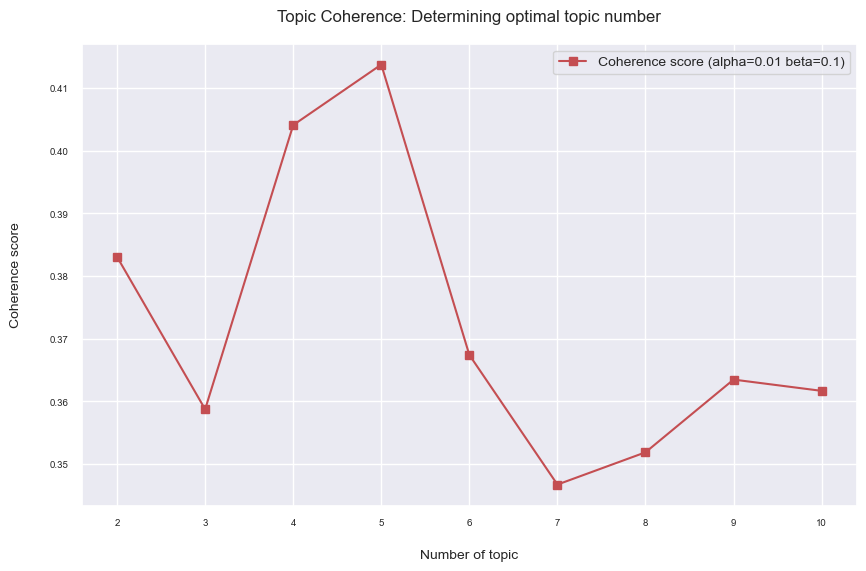

In [36]:
import matplotlib.pyplot as plt  
  
plt.figure(figsize=(10, 6), dpi=100, linewidth = 2)  
plt.plot(topic_nums, coherences, 's-', color = 'r', label="Coherence score (alpha=0.01 beta=0.1)")  
plt.title("Topic Coherence: Determining optimal topic number", x=0.5, y=1.03)  
plt.xticks(fontsize=7)  
plt.yticks(fontsize=7)  
plt.xlabel("Number of topic", fontsize=10, labelpad = 15)  
plt.ylabel("Coherence score", fontsize=10, labelpad = 20)  
  
plt.legend(loc = "best", fontsize=10)  
plt.show()  

In [37]:
target_topic_num = 5  
target_collection = []  
for k, a, b, c in zip(model_results['Topics'], model_results['Alpha'], model_results['Beta'], model_results['Coherence']):  
    if k == target_topic_num:  
        target_collection.append((a, b, c))  
          
target_collection = sorted(target_collection, key=lambda t: t[2], reverse=True)  
target_collection[:10] 

[(0.01, 0.01, 0.4137802339694135),
 ('asymmetric', 0.61, 0.4056555809062921),
 (0.01, 0.9099999999999999, 0.4001011258885),
 ('asymmetric', 0.9099999999999999, 0.38797145374903014),
 ('asymmetric', 'symmetric', 0.3839546663377303),
 (0.31, 0.31, 0.38327208002810165),
 ('asymmetric', 0.31, 0.38037408371455816),
 (0.01, 0.31, 0.3761567956607338),
 ('symmetric', 0.01, 0.373623557718853),
 (0.01, 'symmetric', 0.3701188326272144)]

In [38]:
import plotly.graph_objects as go  
  
a_values = []  
b_values = []  
c_values = []  
for a, b, c in target_collection[:10]:  
    a_values.append(a)  
    b_values.append(b)  
    c_values.append(c)  
      
fig = go.Figure(data=[  
                        go.Table(header=dict(values=['Alpha', 'Belta', 'Coherence']),  
                        cells=dict(values=[a_values, b_values, c_values]))  
                     ])  
fig.show()  

C:\Users\ASUS\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\ASUS\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [39]:
best_co = target_collection[0][2]  
improve_pert = (best_co - coherence_lda) * 100 / coherence_lda  
print("Coherence score is improved by {:.01f}%".format(improve_pert)) 

Coherence score is improved by 27.1%


In [25]:
# Printing the topics
lda_model.print_topics(-1)

[(0,
  '0.027*"russia" + 0.021*"large" + 0.019*"child" + 0.018*"say" + 0.018*"law" + 0.018*"month" + 0.016*"nation" + 0.016*"die" + 0.016*"believe" + 0.015*"story"'),
 (1,
  '0.047*"year" + 0.039*"woman" + 0.035*"old" + 0.029*"police" + 0.025*"man" + 0.021*"ireland" + 0.019*"murder" + 0.017*"kill" + 0.017*"northern" + 0.015*"protest"'),
 (2,
  '0.049*"uk" + 0.043*"rise" + 0.037*"cost" + 0.032*"energy" + 0.031*"price" + 0.029*"go" + 0.026*"bill" + 0.024*"high" + 0.022*"government" + 0.020*"rate"'),
 (3,
  '0.069*"minister" + 0.049*"prime" + 0.027*"mp" + 0.027*"truss" + 0.027*"liz" + 0.022*"commonwealth" + 0.021*"health" + 0.020*"games" + 0.020*"chancellor" + 0.015*"birmingham"'),
 (4,
  '0.058*"say" + 0.026*"need" + 0.023*"bad" + 0.022*"remain" + 0.022*"cut" + 0.022*"street" + 0.022*"power" + 0.021*"long" + 0.019*"time" + 0.018*"year"'),
 (5,
  '0.039*"election" + 0.030*"come" + 0.025*"new" + 0.023*"join" + 0.020*"party" + 0.020*"support" + 0.020*"leader" + 0.017*"climate" + 0.017*"majo